In [6]:
import sys
import numpy as np
from tqdm import tqdm
import nibabel
#!{sys.executable} -m pip install nilearn #install relevant neuroimaging package
#!{sys.executable} -m pip install opencv-python #install video package
from preprocessing import load_and_mask_miyawaki_data
from plots import plt_fmri_stim
import matplotlib.pyplot as plt

In [8]:
#Sort them
import re

def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower() for text in _nsre.split(s)]

image_folder = '/Users/pierrehouzelstein/Documents/GitHub/Machine-Learning-PCS2/code/figures/results_vid'
sorted_images = sorted(os.listdir(image_folder), key=natural_sort_key)

NameError: name 'listdir' is not defined

In [38]:
#create the video
import cv2
import os

video_name = 'video.avi'

images = [img for img in sorted_images if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 4, (width,height))

for image in sorted_images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [5]:
#erase black figs: useless for our use of the data
print(np.shape(stimuli))
print(np.shape(fmri_data))
print(np.shape(stimuli_figures))
print(np.shape(fmri_figures_data))
        
stimuli2 = np.array([element for element in stimuli if np.sum(element) != -100])
fmri_data2 = np.array([fmri_data[i] for i in range(len(fmri_data)) if np.sum(stimuli[i]) != -100])

    
print(np.shape(stimuli2))
print(np.shape(fmri_data2))

stimuli_figures2 = np.array([element for element in stimuli_figures if np.sum(element) != -100])
fmri_figures_data2 = np.array([fmri_figures_data[i] for i in range(len(fmri_figures_data)) if np.sum(stimuli_figures[i]) != -100])

    
print(np.shape(stimuli_figures2))
print(np.shape(fmri_figures_data2))

(2860, 100)
(2860, 5438)
(1536, 100)
(1536, 5438)
(1320, 100)
(1320, 5438)
(720, 100)
(720, 5438)


## First step: Decoding


Let's infer the binary visual stimulus presented to the subject from the recorded fMRI data.

Simple classification: X = fMRI data, y = binary stimuli

As done in Abraham et al., we first use a l1 logistic regression

Issue: the article is from 2014, so some of the code is deprecated: need to correct it

In [7]:
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data2, stimuli2, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

NameError: name 'fmri_data2' is not defined

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import scale

C_list = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

logreg_table = []
train_accuracy, test_accuracy = np.zeros(100), np.zeros(100)

#Train pixel by pixel: fit a logreg for each pixel
for i,pixel in tqdm(enumerate(np.transpose(Y_train))):
    
    # define logistic regressor
    logreg = linear_model.LogisticRegression(penalty='l2', C=0.05, max_iter = 10000)
    
    # fit training data
    logreg.fit(X_train, pixel)
    
    logreg_table.append(logreg)
    
    # check accuracy
    train_accuracy[i]=logreg.score(X_train,pixel)
    test_accuracy[i]=logreg.score(X_test, np.transpose(Y_test)[i])
    
    print('accuracy: train, test')
    print('liblin: %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i]) )

1it [00:01,  1.36s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


2it [00:03,  2.03s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


3it [00:06,  2.26s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


4it [00:10,  2.83s/it]

accuracy: train, test
liblin: 1.0000, 0.5947


5it [00:11,  2.26s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


6it [00:12,  2.01s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


7it [00:15,  2.16s/it]

accuracy: train, test
liblin: 1.0000, 0.5909


8it [00:18,  2.42s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


9it [00:21,  2.52s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


10it [00:23,  2.58s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


11it [00:26,  2.52s/it]

accuracy: train, test
liblin: 1.0000, 0.5985


12it [00:28,  2.57s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


13it [00:31,  2.66s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


14it [00:34,  2.77s/it]

accuracy: train, test
liblin: 1.0000, 0.6288


15it [00:36,  2.32s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


16it [00:38,  2.36s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


17it [00:42,  2.78s/it]

accuracy: train, test
liblin: 1.0000, 0.6326


18it [00:44,  2.67s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


19it [00:47,  2.66s/it]

accuracy: train, test
liblin: 1.0000, 0.6326


20it [00:49,  2.65s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


21it [00:51,  2.23s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


22it [00:52,  1.92s/it]

accuracy: train, test
liblin: 1.0000, 0.7083


23it [00:55,  2.17s/it]

accuracy: train, test
liblin: 1.0000, 0.7008


24it [00:57,  2.27s/it]

accuracy: train, test
liblin: 1.0000, 0.7083


25it [01:00,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.7348


26it [01:02,  2.46s/it]

accuracy: train, test
liblin: 1.0000, 0.6477


27it [01:05,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.7083


28it [01:07,  2.41s/it]

accuracy: train, test
liblin: 1.0000, 0.6742


29it [01:10,  2.49s/it]

accuracy: train, test
liblin: 1.0000, 0.6970


30it [01:12,  2.50s/it]

accuracy: train, test
liblin: 1.0000, 0.6591


31it [01:14,  2.16s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


32it [01:16,  2.26s/it]

accuracy: train, test
liblin: 1.0000, 0.6780


33it [01:19,  2.36s/it]

accuracy: train, test
liblin: 1.0000, 0.7803


34it [01:21,  2.36s/it]

accuracy: train, test
liblin: 1.0000, 0.8106


35it [01:24,  2.45s/it]

accuracy: train, test
liblin: 1.0000, 0.8371


36it [01:26,  2.35s/it]

accuracy: train, test
liblin: 1.0000, 0.8598


37it [01:28,  2.34s/it]

accuracy: train, test
liblin: 1.0000, 0.7917


38it [01:29,  2.02s/it]

accuracy: train, test
liblin: 1.0000, 0.6932


39it [01:32,  2.17s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


40it [01:34,  2.28s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


41it [01:37,  2.38s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


42it [01:40,  2.43s/it]

accuracy: train, test
liblin: 1.0000, 0.6402


43it [01:42,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8598


44it [01:44,  2.22s/it]

accuracy: train, test
liblin: 1.0000, 0.9242


45it [01:45,  1.90s/it]

accuracy: train, test
liblin: 1.0000, 0.9848


46it [01:46,  1.52s/it]

accuracy: train, test
liblin: 1.0000, 0.9848


47it [01:48,  1.75s/it]

accuracy: train, test
liblin: 1.0000, 0.9394


48it [01:50,  1.89s/it]

accuracy: train, test
liblin: 1.0000, 0.8674


49it [01:53,  2.08s/it]

accuracy: train, test
liblin: 1.0000, 0.7197


50it [01:55,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.7159


51it [01:58,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.6856


52it [02:00,  2.33s/it]

accuracy: train, test
liblin: 1.0000, 0.7008


53it [02:02,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.8447


54it [02:04,  2.17s/it]

accuracy: train, test
liblin: 1.0000, 0.9205


55it [02:05,  1.82s/it]

accuracy: train, test
liblin: 1.0000, 0.9962


56it [02:06,  1.58s/it]

accuracy: train, test
liblin: 1.0000, 0.9848


57it [02:08,  1.75s/it]

accuracy: train, test
liblin: 1.0000, 0.9697


58it [02:10,  1.79s/it]

accuracy: train, test
liblin: 1.0000, 0.9015


59it [02:13,  1.99s/it]

accuracy: train, test
liblin: 1.0000, 0.7424


60it [02:15,  2.02s/it]

accuracy: train, test
liblin: 1.0000, 0.7045


61it [02:18,  2.39s/it]

accuracy: train, test
liblin: 1.0000, 0.7235


62it [02:21,  2.45s/it]

accuracy: train, test
liblin: 1.0000, 0.6894


63it [02:23,  2.44s/it]

accuracy: train, test
liblin: 1.0000, 0.7500


64it [02:25,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8068


65it [02:27,  2.20s/it]

accuracy: train, test
liblin: 1.0000, 0.9015


66it [02:29,  2.13s/it]

accuracy: train, test
liblin: 1.0000, 0.8977


67it [02:31,  2.10s/it]

accuracy: train, test
liblin: 1.0000, 0.8220


68it [02:34,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.7652


69it [02:36,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


70it [02:38,  2.06s/it]

accuracy: train, test
liblin: 1.0000, 0.6818


71it [02:40,  2.24s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


72it [02:43,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


73it [02:45,  2.35s/it]

accuracy: train, test
liblin: 1.0000, 0.6742


74it [02:48,  2.40s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


75it [02:49,  2.04s/it]

accuracy: train, test
liblin: 1.0000, 0.7576


76it [02:51,  2.14s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


77it [02:55,  2.53s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


78it [02:56,  2.16s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


79it [03:00,  2.66s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


80it [03:01,  2.29s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


81it [03:05,  2.67s/it]

accuracy: train, test
liblin: 1.0000, 0.6553


82it [03:07,  2.64s/it]

accuracy: train, test
liblin: 1.0000, 0.6061


83it [03:09,  2.28s/it]

accuracy: train, test
liblin: 1.0000, 0.6364


84it [03:11,  2.42s/it]

accuracy: train, test
liblin: 1.0000, 0.6061


85it [03:14,  2.51s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


86it [03:17,  2.69s/it]

accuracy: train, test
liblin: 1.0000, 0.6629


87it [03:20,  2.65s/it]

accuracy: train, test
liblin: 1.0000, 0.6515


88it [03:23,  2.66s/it]

accuracy: train, test
liblin: 1.0000, 0.5795


89it [03:25,  2.65s/it]

accuracy: train, test
liblin: 1.0000, 0.6023


90it [03:28,  2.65s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


91it [03:29,  2.26s/it]

accuracy: train, test
liblin: 1.0000, 0.6212


92it [03:31,  2.03s/it]

accuracy: train, test
liblin: 1.0000, 0.5455


93it [03:33,  2.23s/it]

accuracy: train, test
liblin: 1.0000, 0.6439


94it [03:36,  2.30s/it]

accuracy: train, test
liblin: 1.0000, 0.6136


95it [03:38,  2.37s/it]

accuracy: train, test
liblin: 1.0000, 0.6174


96it [03:41,  2.46s/it]

accuracy: train, test
liblin: 1.0000, 0.5871


97it [03:44,  2.55s/it]

accuracy: train, test
liblin: 1.0000, 0.5038


98it [03:46,  2.54s/it]

accuracy: train, test
liblin: 1.0000, 0.6250


99it [03:48,  2.19s/it]

accuracy: train, test
liblin: 1.0000, 0.6098


100it [03:51,  2.31s/it]

accuracy: train, test
liblin: 1.0000, 0.5682


In [ ]:
print("The accuracy on our test set is " + np.mean(test_accuracy))

In [8]:
image = np.zeros(100)


n=50
xtest = fmri_figures_data2[n].reshape(1,-1)
ytest = np.reshape(stimuli_figures2[n],(10,10))

for i,pixel in enumerate(image) :
    #try: 
    y = logreg_table[i].predict(xtest)
    
    image[i] = y
    
image = np.reshape(image,(10,10))

from sklearn.preprocessing import Binarizer

image = Binarizer(threshold=0.5).fit_transform(image)

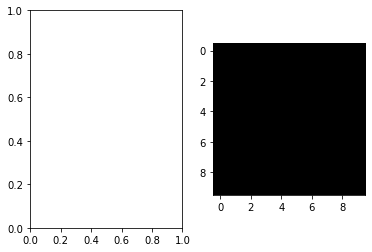

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
sp1 = plt.subplot(121)
sp2 = plt.subplot(122)
sp1.imshow(ytest, cmap = plt.cm.gray, interpolation = 'nearest')
sp2.imshow(image, cmap = plt.cm.gray, interpolation = 'nearest')

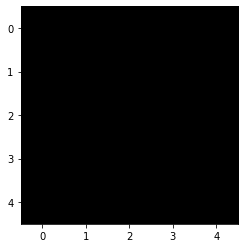

In [11]:
plt.imshow(np.zeros((5,5)), cmap = plt.cm.gray, interpolation = 'nearest')

In [156]:
tot = 0

for i,elmnt in enumerate(stimuli) :
    print(np.sum(elmnt))

-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
46.0
46.0
46.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
40.0
40.0
40.0
-100.0
-100.0
-100.0
49.0
49.0
49.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
43.0
43.0
43.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
45.0
45.0
45.0
-100.0
-100.0
-100.0
61.0
61.0
61.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-10

In [27]:
#Supervised learning: NN
import random
from keras import losses, optimizers, metrics, callbacks
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Add, Dropout
                
params = {
        # https://keras.io/guides/sequential_model/
    'hidden_layers': {
            'units': 2674,
            'activation': 'relu',
            'use_bias': True,
            'kernel_initializer': 'GlorotUniform',
            'kernel_regularizer': None,
            'bias_regularizer': 'l2',
            'activity_regularizer': None,
            'kernel_constraint': None,
            'bias_constraint': None
            },
    'compilation': {
            'optimizer': Adam(
                learning_rate=0.001
                ),
            'loss': losses.MeanSquaredError(),
            'metrics': [metrics.MeanSquaredError(), metrics.MeanAbsoluteError()],
        },
    'fit': {
        'batch_size': 32,
        'epochs': 100,
        'callbacks' : [
            callbacks.EarlyStopping(monitor='loss', patience=10), 
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]
            }
          }



def create_DNN(input_data, hidden_layers_params, dropout_rate):
    model = Sequential() 
    
    input_layer = Dense(5348, input_shape=(np.shape(input_data)[1],)) 
    model.add(input_layer)
    
    hidden_layer = Dense(**hidden_layers_params)
    model.add(hidden_layer)
    
    dropout_layer = Dropout(dropout_rate)
    model.add(dropout_layer)
    
    #hidden_layer = Dense(**hidden_layers_params_2,)
    #model.add(hidden_layer) 
    
    
    output_layer = Dense(100, activation='sigmoid') 
    model.add(output_layer)
    
    return model

#Set up network
model = create_DNN(fmri_data, params['hidden_layers'], dropout_rate=0.25)
model.compile(**params['compilation'])

In [28]:
#Def fraction train/test/validation
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data, stimuli, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

print('Training network (this might take a while)...')
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.1,
    verbose=1,
    **params['fit']
)

Training network (this might take a while)...
Epoch 1/100
65/65 [==============================] - 13s 202ms/step - loss: 0.8148 - mean_squared_error: 0.8148 - mean_absolute_error: 0.7826 - val_loss: 0.7781 - val_mean_squared_error: 0.7781 - val_mean_absolute_error: 0.7633 - lr: 0.0010
Epoch 2/100
65/65 [==============================] - 13s 198ms/step - loss: 0.7864 - mean_squared_error: 0.7864 - mean_absolute_error: 0.7734 - val_loss: 0.7733 - val_mean_squared_error: 0.7733 - val_mean_absolute_error: 0.7616 - lr: 0.0010
Epoch 3/100
65/65 [==============================] - 13s 199ms/step - loss: 0.7842 - mean_squared_error: 0.7842 - mean_absolute_error: 0.7721 - val_loss: 0.7791 - val_mean_squared_error: 0.7791 - val_mean_absolute_error: 0.7634 - lr: 0.0010
Epoch 4/100
65/65 [==============================] - 12s 191ms/step - loss: 0.7837 - mean_squared_error: 0.7837 - mean_absolute_error: 0.7721 - val_loss: 0.7734 - val_mean_squared_error: 0.7734 - val_mean_absolute_error: 0.7614 - l

In [29]:
print('Number of epochs run:', len(history.history['loss']))

# Calculate and print scores
print('Evaluating model performance on test set...')
scores = model.evaluate(X_test, Y_test, verbose=0)

max_metrics_name_length = len(max(model.metrics_names, key=len))
print()
print(' Scores '.center(max_metrics_name_length + 13, '='))
line = '{:<%i} : {:.4e}' % max_metrics_name_length
for i in range(len(model.metrics_names)):
    print(line.format(model.metrics_names[i], scores[i]))
print()

Number of epochs run: 32
Evaluating model performance on test set...

============ Scores ============
loss                : 7.8617e-01
mean_squared_error  : 7.8617e-01
mean_absolute_error : 7.8089e-01



Test loss: 0.7861713767051697


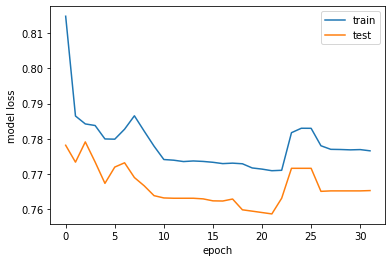

In [30]:
# print performance
print('Test loss:', scores[0])

# look into training history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [34]:
#That's bad, so we'll try to optimize those parameters with a grid search
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from tensorflow.keras.optimizers import SGD

space={'learning_rate': hp.choice('learning_rate', [0.1, 1, 2, 3]),
       'dropout_rate': hp.choice('dropout_rate', [0., 0.1, 0.25, 0.4]),
       #'units': hp.choice('units', [10, 20, 32, 64])
       #'momentum': hp.choice('momentum', [0.001, 0.1, 1])
       'batch_size': hp.choice('batch_size', [16, 32, 48, 64]),
       'patience_1': hp.choice('patience_1', [3, 5, 7, 10]),
       'patience_2': hp.choice('patience_2', [3, 5, 7, 10]),
       'optimizer': hp.choice('optimizer', ['SGD','Adam'])
}

def objective(target):
    
    params = {
    # https://keras.io/guides/sequential_model/
    'hidden_layers': {
            'units': 2674,
            'activation': 'relu',
            'use_bias': True,
            'kernel_initializer': 'GlorotUniform',
            'kernel_regularizer': None,
            'bias_regularizer': 'l2',
            'activity_regularizer': None,
            'kernel_constraint': None,
            'bias_constraint': None
            },
    'compilation': {
            'optimizer': Adam(
                learning_rate=0.001
                ),
            'loss': losses.MeanSquaredError(),
            'metrics': [metrics.MeanSquaredError(), metrics.MeanAbsoluteError()],
        },
    'fit': {
        'batch_size': 32,
        'epochs': 100,
        'callbacks' : [
            callbacks.EarlyStopping(monitor='loss', patience=10), 
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]
            }
          }


    # Create model and train it
    model = create_DNN(fmri_data, params['hidden_layers'], dropout_rate=0.25)
    model.compile(**params['compilation'])
    history = model.fit(
        X_train,
        Y_train,
        validation_split=0.1,
        verbose=0,
        **params['fit']
        )
    
    loss=history.history['val_loss'][-1]
    
    return {'loss': loss, 'status': STATUS_OK }

trials=Trials()
best = fmin(objective,
            space, 
            algo=tpe.suggest, 
            trials=trials, 
            max_evals=50
            )

print ("Best result:", best)
print (trials.best_trial)

  6%|▌         | 3/50 [18:17<4:46:28, 365.71s/trial, best loss: 0.7572489976882935]


KeyboardInterrupt: 